In [15]:
## get working directory
import os
print(os.getcwd())
### Change working directory
os.chdir('C://Users//Priyanka A. Sachdeva//Desktop//DSDM Brush Up')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('PrepHomework_data.csv')

# Drop rows with NaN or infinite values in the relevant columns
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['socialnetshare', 'corruption'])

# Optionally, cap the values to prevent excessively large numbers from causing issues
# df['socialnetshare'] = np.clip(df['socialnetshare'], 1000, 9000)
# df['corruption'] = np.clip(df['corruption'], 80, 100)

df.head(5)

C:\Users\Priyanka A. Sachdeva\Desktop\DSDM Brush Up


,obs,socialnetshare,lngdp,corruption
0,Argentina,4320.000000,8.962254,93.970001
1,Australia,7296.000000,10.037756,83.639999
2,Austria,6464.619629,10.138426,85.750000
3,Belgium,6975.000000,10.076495,85.910004
5,Brazil,3943.050049,8.272016,92.400002


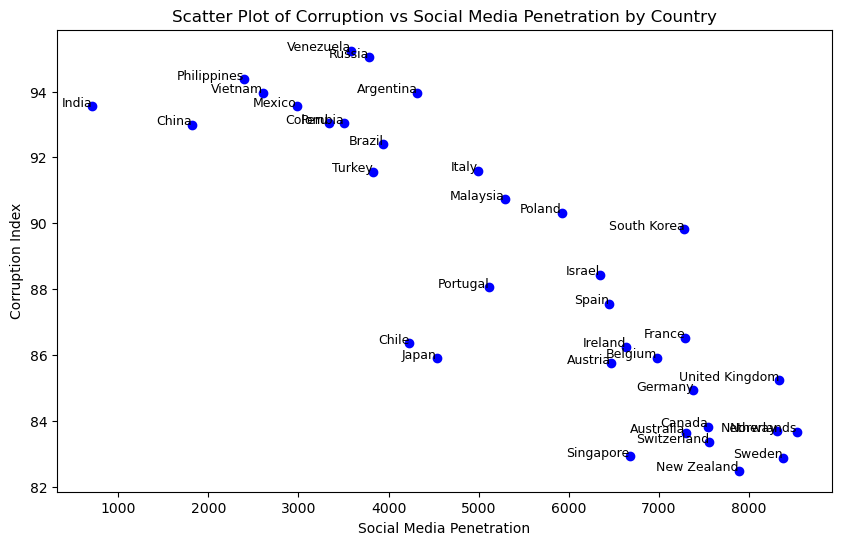

In [16]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Iterate through the DataFrame to plot each label with the combination of Socialnetshare, Corruption, and Country Name
for i in range(len(df)):
    x = df['socialnetshare'].iloc[i]
    y = df['corruption'].iloc[i]
    label = df['obs'].iloc[i]
    # Plot each point
    plt.scatter(x, y, color='blue')  # You can change the color if needed
    
    # Add the country name as a label next to each point
    plt.text(x, y, label, fontsize=9, ha='right')

# Adding labels and title
plt.xlabel('Social Media Penetration')
plt.ylabel('Corruption Index')
plt.title('Scatter Plot of Corruption vs Social Media Penetration by Country')

# Show the plot
plt.show()

In [12]:
############ Part 2

# Calculate the GDP quintiles
df['GDP_quintile'] = pd.qcut(df['lngdp'], q=5, labels=False)

# Separate the data into top and bottom GDP quintiles
top_gdp_quintile = df[df['GDP_quintile'] == 4]  # Top 20% GDP
bottom_gdp_quintile = df[df['GDP_quintile'] == 0]  # Bottom 20% GDP


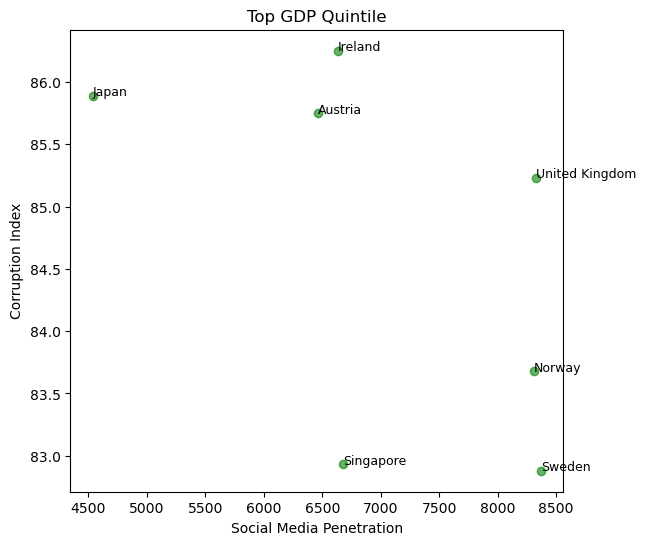

In [17]:
# Plot for the top GDP quintile
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(top_gdp_quintile['socialnetshare'], top_gdp_quintile['corruption'], color='green', alpha=0.6)
plt.xlabel('Social Media Penetration')
plt.ylabel('Corruption Index')
plt.title('Top GDP Quintile')


# Add labels for the top GDP quintile
for country, x, y in zip(top_gdp_quintile['obs'], top_gdp_quintile['socialnetshare'], top_gdp_quintile['corruption']):
    plt.annotate(country, (x, y), fontsize=9)

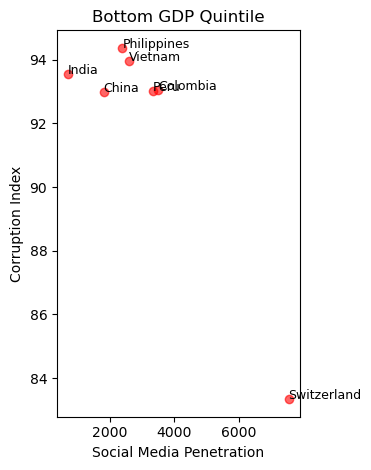

In [14]:
# Plot for the bottom GDP quintile
plt.subplot(1, 2, 2)
plt.scatter(bottom_gdp_quintile['socialnetshare'], bottom_gdp_quintile['corruption'], color='red', alpha=0.6)
plt.xlabel('Social Media Penetration')
plt.ylabel('Corruption Index')
plt.title('Bottom GDP Quintile')

# Add labels for the bottom GDP quintile
for country, x, y in zip(bottom_gdp_quintile['obs'], bottom_gdp_quintile['socialnetshare'], bottom_gdp_quintile['corruption']):
    plt.annotate(country, (x, y), fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()